### Application of TDA to magnetogram

This notebook presents an example of calculating the persistence diagram for a magnetogram using the [Dipha library](https://github.com/DIPHA/dipha)

In [1]:
from dipha_utils import *
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import pandas as pd
import numpy as np
from astropy.io import fits
import time
import datetime
%matplotlib inline

In [26]:
#Function for download matrix from fits and plot results
def download_fits(filepath, show = True):
    #Потом из директории загружаем и делаем, что хотим
    hdulist = fits.open(filepath)
    hdulist[1].verify("silentfix")
    fits_data1 =  hdulist[1].data
    split_name = filepath.split('.')
    harp = split_name[2]
    data_region = datetime.datetime.strptime(split_name[3],'%Y%m%d_%H%M%S_TAI')

    if show:
        title_ = 'HARP'+ str(harp)+' at '+ str(data_region.strftime('%Y-%m-%d_%H%M'))
        plt.imshow(fits_data1,cmap = plt.get_cmap('gray')); plt.title(title_); plt.axis('off')
    return fits_data1

In [39]:
filename1 = 'hmi.sharp_720s.5692.20150623_000000_TAI.magnetogram.fits'
filename2 = 'hmi.sharp_720s.71.20100701_000000_TAI.magnetogram.fits'

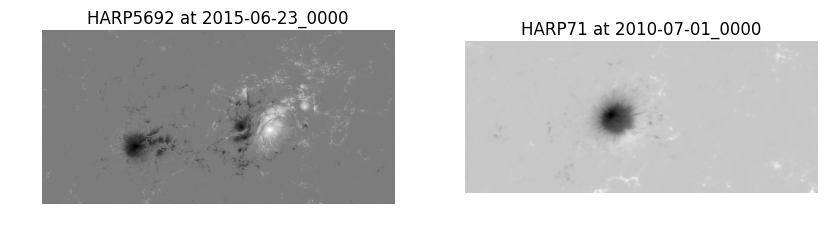

In [40]:
plt.figure(figsize = (10,4))
plt.subplot(121); fitsdata=download_fits(filename1, show = True)
plt.subplot(122); fitsdata=download_fits(filename2, show = True)

In [33]:
from dipha_utils import *

def normalize_fits(fitsdata, prange = [5, 95]):
    norm_fits = (fitsdata/np.diff(np.percentile(fitsdata, [5,95])))
    norm_fits =(norm_fits - np.min(norm_fits.flatten()))/(np.max(norm_fits.flatten())-np.min(norm_fits.flatten()))
    return norm_fits

def compute_fitsPD(fitspath, diphadir, diphasavedir, show = True):
    """
    need to import packages before using      import os
                from dipha_utils import * 
    Compute PD by fits
    fitspath: full path to fits
    showFits: option for plot show
    diphadir = full path to dipha binaries
    diphasave = 
    """

    fitsname = os.path.split(fitspath)[1]
    fitsdata=download_fits(fitspath, show = False)
    if np.isnan(fitsdata).any():
        print('Bad fits contains nan')
        return -1
    norm_fits = normalize_fits(fitsdata, prange = [5, 95])
    

    diphasave = os.path.join(diphasavedir,fitsname)+'.dph'

    save_do_dipha(norm_fits, diphasave)
    run_dipha(diphasave, diphadir)
    dgmfile = diphasave + '.dgm'
    dims,birth, death = read_PD_dipha(dgmfile)
    
    
    if show:
        plt.figure(figsize=(13,3))
        plt.subplot(131); plt.imshow(norm_fits ,cmap = plt.get_cmap('gray')); plt.title(os.path.split(fitspath)[1])
        plt.subplot(132); plt.scatter(birth[dims==0],death[dims==0])
        plt.subplot(133); plt.scatter(birth[dims==1],death[dims==1])
    
    try:
        os.remove(diphasave)
    except OSError:
        pass
    
    return dims,birth, death

Image was saved to dipha compatible format with name /Users/Irisha1/Documents/Pulkovo/_SolarData/DiphaRes/hmi.sharp_720s.71.20100701_000000_TAI.magnetogram.fits.dph
CompletedProcess(args=['mpiexec', '-n', '4', '/Users/Irisha1/Documents/SoftOthers/Dipha/dipha', '/Users/Irisha1/Documents/Pulkovo/_SolarData/DiphaRes/hmi.sharp_720s.71.20100701_000000_TAI.magnetogram.fits.dph', '/Users/Irisha1/Documents/Pulkovo/_SolarData/DiphaRes/hmi.sharp_720s.71.20100701_000000_TAI.magnetogram.fits.dph.dgm'], returncode=0)


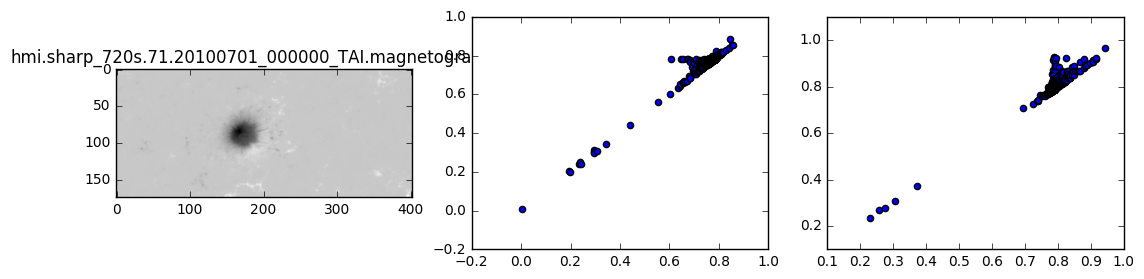

In [43]:
#path to save dipha files
diphasavedir = '/Users/Irisha1/Documents/Pulkovo/_SolarData/DiphaRes/'
#path to dipha library 
diphadir = '/Users/Irisha1/Documents/SoftOthers/Dipha/dipha' 
fitspath = filename1
_=compute_fitsPD(fitspath, diphadir, diphasavedir)

Image was saved to dipha compatible format with name /Users/Irisha1/Documents/Pulkovo/_SolarData/DiphaRes/hmi.sharp_720s.5692.20150623_000000_TAI.magnetogram.fits.dph
CompletedProcess(args=['mpiexec', '-n', '4', '/Users/Irisha1/Documents/SoftOthers/Dipha/dipha', '/Users/Irisha1/Documents/Pulkovo/_SolarData/DiphaRes/hmi.sharp_720s.5692.20150623_000000_TAI.magnetogram.fits.dph', '/Users/Irisha1/Documents/Pulkovo/_SolarData/DiphaRes/hmi.sharp_720s.5692.20150623_000000_TAI.magnetogram.fits.dph.dgm'], returncode=0)


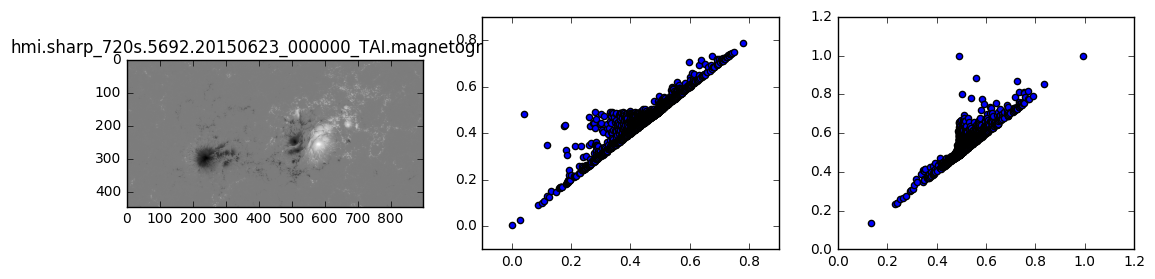

In [35]:
#path to save dipha files
diphasavedir = '/Users/Irisha1/Documents/Pulkovo/_SolarData/DiphaRes/'
#path to dipha library 
diphadir = '/Users/Irisha1/Documents/SoftOthers/Dipha/dipha'
fitspath = filename2
_=compute_fitsPD(fitspath, diphadir, diphasavedir)